### Matplotlib

### by Rishickesh

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
matches = pd.read_csv('C:\\Users\User\Downloads\matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


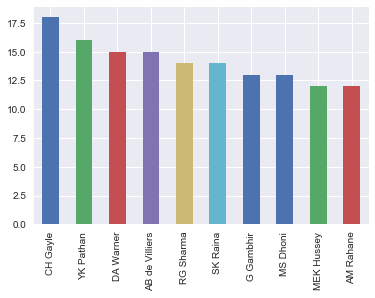

In [9]:
matches.player_of_match.value_counts()[:10].plot('bar')

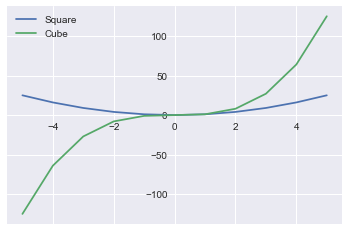

In [25]:
plt.plot(data, data_sq, label = 'Square')
plt.plot(data, data_cube, label = 'Cube')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.legend()

In [4]:
deliveries = pd.read_csv('C:\\Users\User\Downloads\deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Line plot

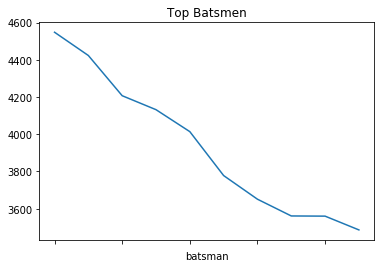

In [5]:
batsman_runs = deliveries.groupby(['batsman']).batsman_runs.sum().nlargest(10)
batsman_runs.plot(title = 'Top Batsmen', rot = 30)

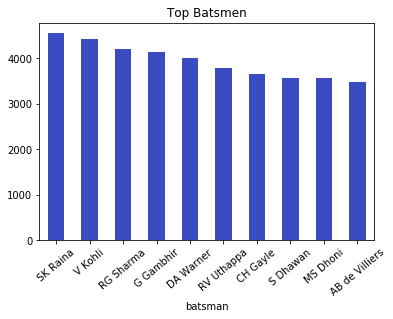

In [7]:
deliveries.groupby(['batsman']).batsman_runs.sum().nlargest(10).plot(kind = 'bar',title = 'Top Batsmen', rot = 40, colormap = 'coolwarm')

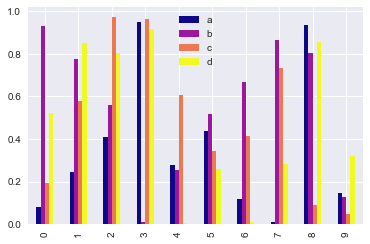

In [38]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df
df.plot.bar(colormap = 'plasma')

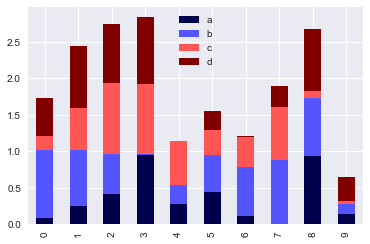

In [39]:
df.plot.bar(stacked=True, colormap = 'seismic')

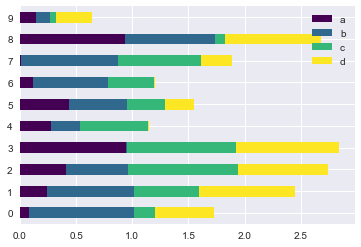

In [40]:
df.plot.barh(stacked=True, colormap = 'viridis')

#### Bar plot of batsmen's total score in 2015 vs 2016

In [41]:
ipl = matches[['id', 'season']].merge(deliveries, left_on = 'id', right_on = 'match_id').drop('match_id', axis = 1)
runs_comparison = ipl[ipl.season.isin([2015, 2016])].groupby(['season', 'batsman']).batsman_runs.sum().nlargest(20).reset_index().sort_values(by='batsman')
vc = runs_comparison.batsman.value_counts()
batsmen_comparison = runs_comparison[runs_comparison.batsman.isin(vc[vc == 2].index.tolist())]
batsmen_comparison

,season,batsman,batsman_runs
2,2016,AB de Villiers,687
6,2015,AB de Villiers,513
4,2015,AM Rahane,540
13,2016,AM Rahane,480
1,2016,DA Warner,848
3,2015,DA Warner,562
11,2016,RG Sharma,489
12,2015,RG Sharma,482
7,2015,V Kohli,505
0,2016,V Kohli,973


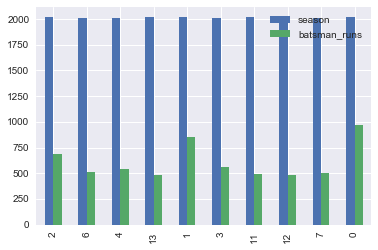

In [42]:
batsmen_comparison.plot.bar()

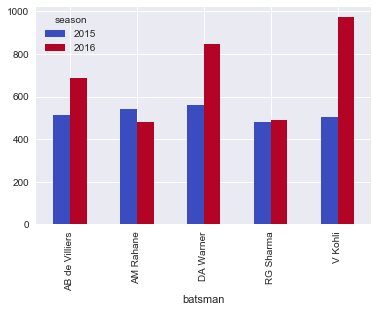

In [43]:
batsmen_comparison.pivot('batsman', 'season', 'batsman_runs').plot(kind = 'bar', colormap = 'coolwarm')

#### Pie Chart

In [44]:
match_winners = matches.winner.value_counts()
match_winners

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

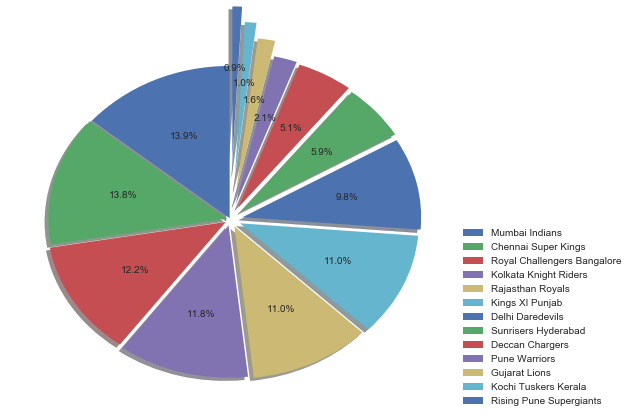

In [45]:
fig, ax = plt.subplots(figsize=(8,7))
explode = (0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4)
ax.pie(match_winners, labels = None, autopct='%1.1f%%', startangle=90, shadow = True, explode = explode)
ax.legend(bbox_to_anchor=(1,0.5), labels=match_winners.index)

#### Histogram

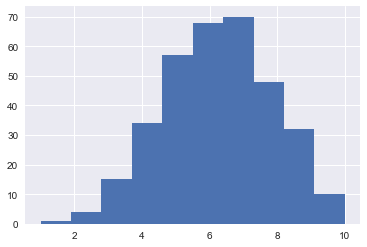

In [44]:
matches[matches.win_by_wickets != 0].win_by_wickets.hist()

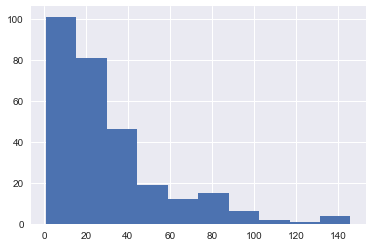

In [45]:
matches[matches.win_by_runs != 0].win_by_runs.hist()

#matches[matches.win_by_runs != 0].win_by_runs.hist(bins=40) #default value bins = 10

In [48]:
df = pd.DataFrame(np.random.rand(10, 5))
df
df.describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.534054,0.488904,0.436181,0.574376,0.433318
std,0.270163,0.353324,0.296373,0.245550,0.291317
min,0.146693,0.002146,0.008346,0.001054,0.036574
25%,0.368754,0.182026,0.184625,0.517672,0.246001
50%,0.488262,0.609259,0.424555,0.622865,0.322702
75%,0.746786,0.695600,0.693849,0.647888,0.675228
max,0.962689,0.966114,0.822860,0.873335,0.929734


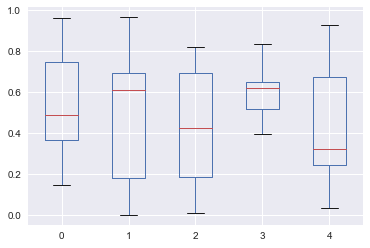

In [49]:
df.boxplot()

In [50]:
team_score = deliveries.groupby(['match_id', 'batting_team']).total_runs.sum().reset_index()

top_teams = deliveries.groupby('batting_team').total_runs.sum().nlargest(5).reset_index().batting_team.tolist()
top_teams_df = team_score[team_score.batting_team.isin(top_teams)]


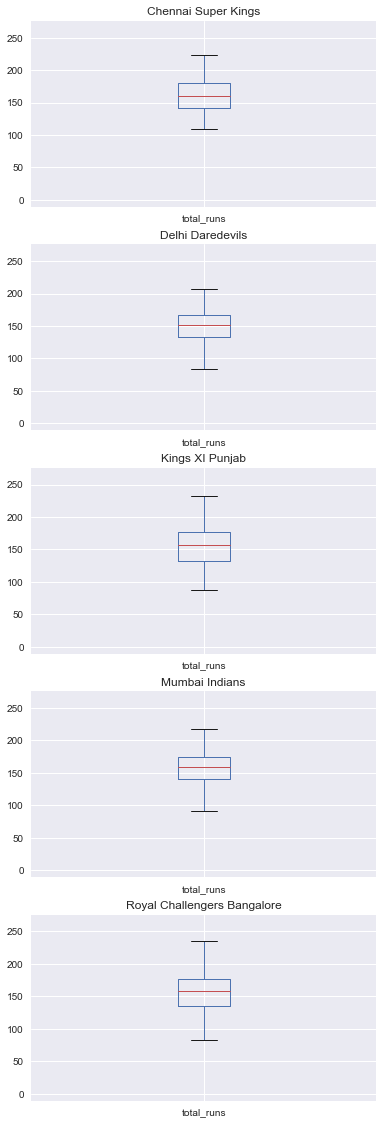

In [51]:
top_teams_df.groupby('batting_team').boxplot(column = 'total_runs', layout=(5,1),figsize=(6,20));

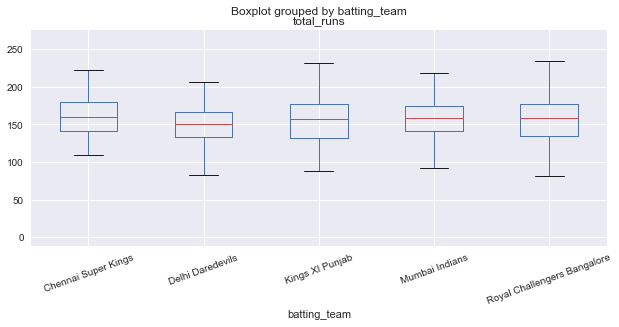

In [52]:
top_teams_df.boxplot( column = 'total_runs',by = 'batting_team', rot = 20, figsize = (10,4));

#### Area Plot

In [53]:
df = pd.DataFrame(np.random.randint(5, 50, (10,3)))
df = df.divide(df.sum(axis=1), axis=0)*100
df

,0,1,2
0,26.271186,35.593220,38.135593
1,53.424658,31.506849,15.068493
2,7.575758,72.727273,19.696970
3,36.231884,36.231884,27.536232
4,17.543860,38.596491,43.859649
5,15.853659,59.756098,24.390244
6,46.391753,36.082474,17.525773
7,44.594595,14.864865,40.540541
8,62.857143,25.714286,11.428571
9,32.075472,25.471698,42.452830


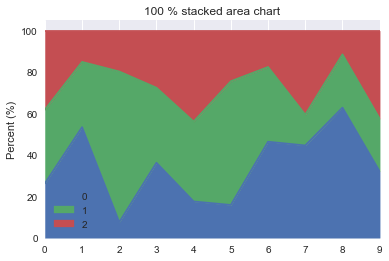

In [54]:
ax = df.plot(kind='area', stacked=True, title='100 % stacked area chart')

ax.set_ylabel('Percent (%)')

In [55]:
ipl = matches[['id', 'season']].merge(deliveries, left_on = 'id', right_on = 'match_id').drop('match_id', axis = 1)
grp = ipl.groupby(['season', 'batting_team']).total_runs.sum().reset_index()
grp = grp[grp.batting_team.isin(top_teams)].pivot('season', 'batting_team', 'total_runs')
grp = grp.divide(grp.sum(axis=1), axis=0)
grp

batting_team,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Mumbai Indians,Royal Challengers Bangalore
season,,,,,
2008,0.225705,0.189700,0.220690,0.186296,0.177609
2009,0.213146,0.203592,0.184198,0.181236,0.217827
2010,0.213688,0.176842,0.187756,0.224684,0.197029
2011,0.220158,0.179481,0.191262,0.196766,0.212332
2012,0.221172,0.206641,0.186719,0.192344,0.193125
2013,0.213249,0.172334,0.186382,0.228372,0.199662
2014,0.217856,0.171079,0.245561,0.193440,0.172065
2015,0.227919,0.181332,0.168786,0.228672,0.193292
2016,NaN,0.223521,0.226708,0.233082,0.316690


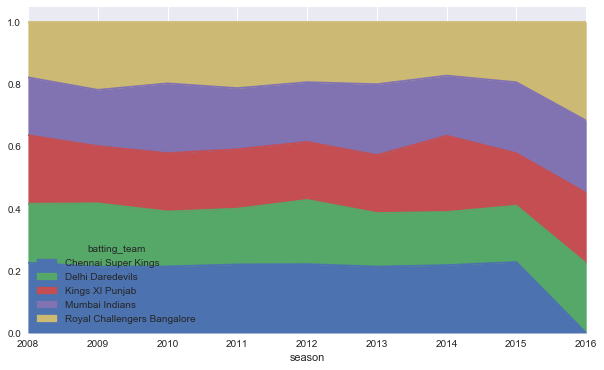

In [56]:
grp.plot(figsize=(10,6),kind='area', stacked=True)

#### Scatter plot

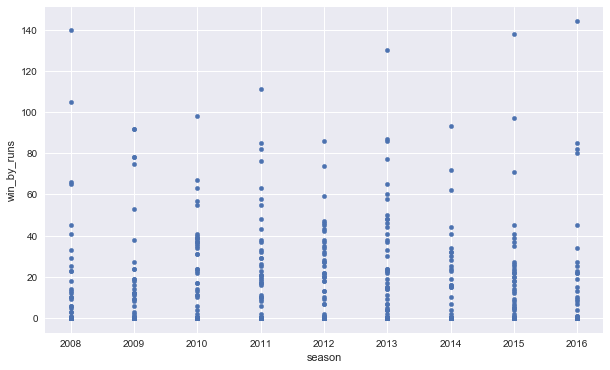

In [57]:
matches.plot(kind='scatter', x = 'season', y = 'win_by_runs', figsize=(10,6))

## Seaborn

In [46]:
import seaborn as sns
sns.set(color_codes=True)

### Barplot

In [47]:
batsmen_comparison

,season,batsman,batsman_runs
2,2016,AB de Villiers,687
6,2015,AB de Villiers,513
4,2015,AM Rahane,540
13,2016,AM Rahane,480
1,2016,DA Warner,848
3,2015,DA Warner,562
11,2016,RG Sharma,489
12,2015,RG Sharma,482
7,2015,V Kohli,505
0,2016,V Kohli,973


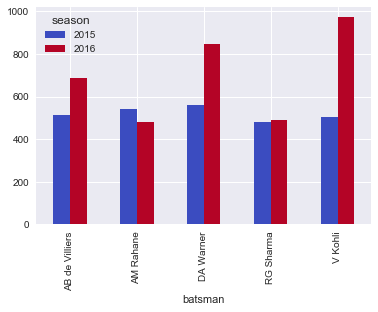

In [61]:
batsmen_comparison.pivot('batsman', 'season', 'batsman_runs').plot(kind = 'bar', colormap = 'coolwarm')

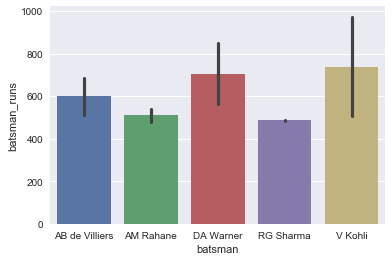

In [48]:
sns.barplot(x = 'batsman', y = 'batsman_runs',data = batsmen_comparison)
#sns.barplot(x = 'batsman', y = 'batsman_runs', hue = 'season',data = batsmen_comparison)

### Countplot

#### Create barplot with number of matches won by each team in dataframe matches.


In [68]:
matches.winner.value_counts().reset_index()

,index,winner
0,Mumbai Indians,80
1,Chennai Super Kings,79
2,Royal Challengers Bangalore,70
3,Kolkata Knight Riders,68
4,Rajasthan Royals,63
5,Kings XI Punjab,63
6,Delhi Daredevils,56
7,Sunrisers Hyderabad,34
8,Deccan Chargers,29
9,Pune Warriors,12


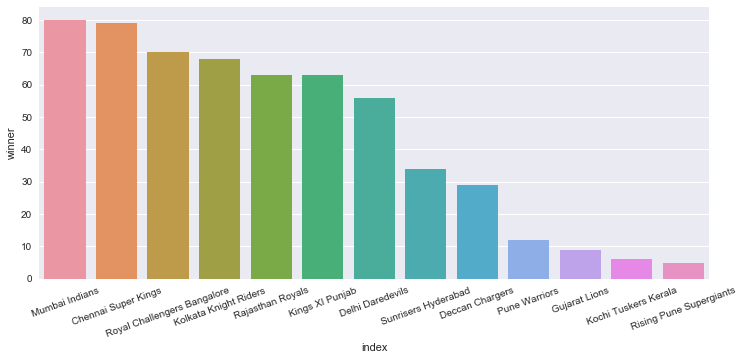

In [66]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'index', y = 'winner', data = matches.winner.value_counts().reset_index())
plt.xticks(rotation=20);

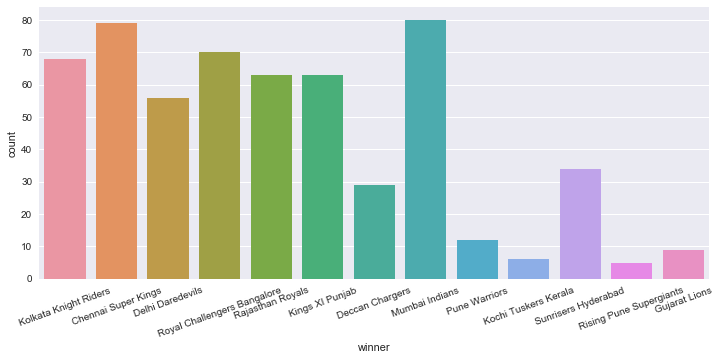

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
g = sns.countplot(x='winner', data=matches, ax = ax)
g.set_xticklabels(g.get_xticklabels(), rotation=20);

### Boxplot

Distribution of runs made by top 5 teams throughout ipl

In [76]:
team_score = deliveries.groupby(['match_id', 'inning','batting_team']).total_runs.sum().reset_index()
top_teams = deliveries.groupby('batting_team').total_runs.sum().nlargest(5).reset_index().batting_team.tolist()
top_teams_df = team_score[team_score.batting_team.isin(top_teams)]
top_teams_df = top_teams_df[top_teams_df.inning.isin([1,2])]
top_teams_df.head()

,match_id,inning,batting_team,total_runs
1,1,2,Royal Challengers Bangalore,82
2,2,1,Chennai Super Kings,240
3,2,2,Kings XI Punjab,207
5,3,2,Delhi Daredevils,132
6,4,1,Mumbai Indians,165


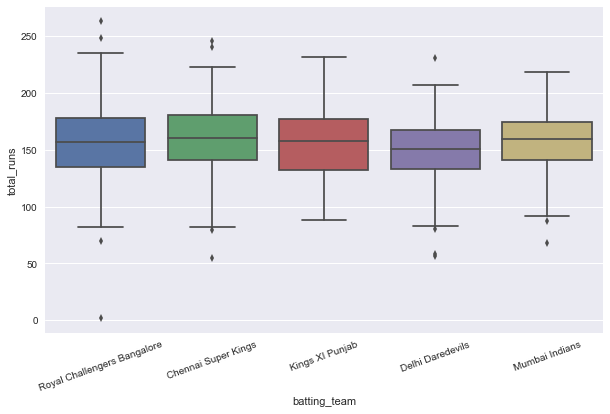

In [77]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='total_runs', x='batting_team', data = top_teams_df)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

#### boxplot with hue

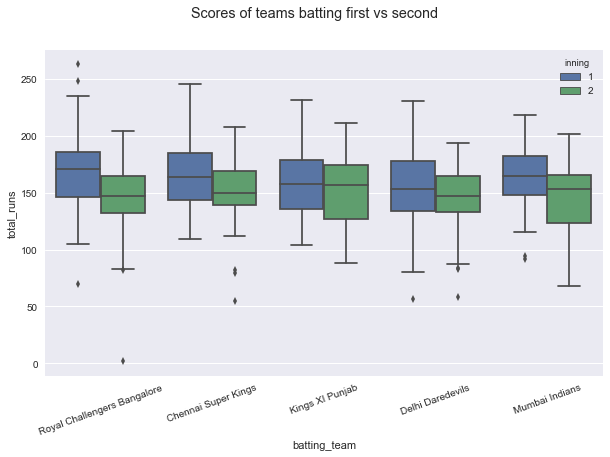

In [103]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='total_runs', x='batting_team', hue = 'inning', data = top_teams_df)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
plt.suptitle('Scores of teams batting first vs second');

### violin plot
similar to box plot with a rotated kernel density plot on each side

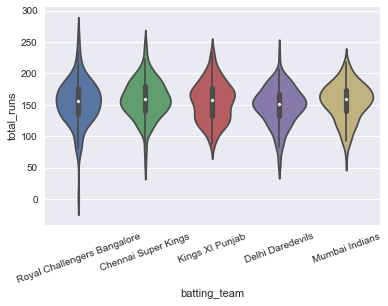

In [80]:
g = sns.violinplot(x='batting_team', y='total_runs', data=top_teams_df)
g.set_xticklabels(top_teams_df['batting_team'],rotation=20);

### Swarm plot

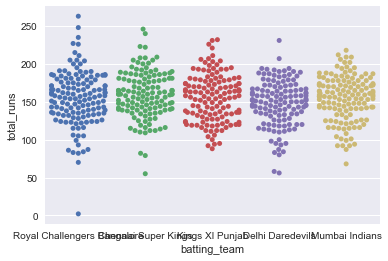

In [81]:
sns.swarmplot(x='batting_team', y='total_runs', data=top_teams_df);

### overlaying plots

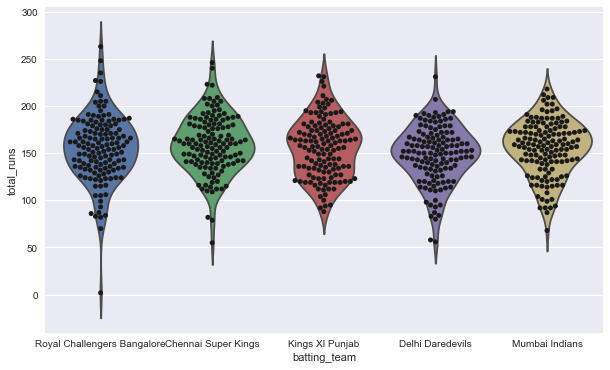

In [82]:
plt.figure(figsize=(10,6))
sns.violinplot(x='batting_team', y='total_runs', inner=None, data=top_teams_df)
sns.swarmplot(x='batting_team', y='total_runs',color='k', data=top_teams_df);

### Plotting univariate distributions
#### Histogram

distplot(): Used to take a quick look at a univariate distribution. By default, this will draw a histogram and fit a kernel density estimate (KDE).


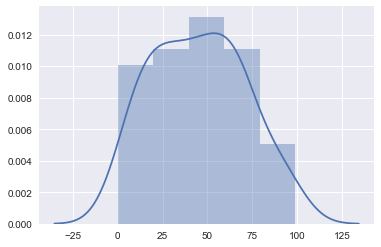

In [91]:
sns.distplot(pd.Series(np.random.randint(0,100, 50)))
#sns.distplot(pd.Series(np.random.randint(0,100, 50)), bins = 10)

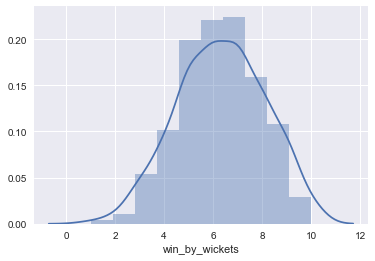

In [89]:
sns.distplot(matches[matches['win_by_wickets'] != 0].win_by_wickets, bins = 10)

#### Remove the density curve and add a rug plot

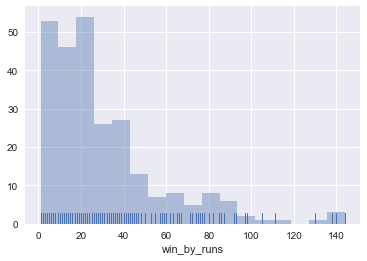

In [92]:
sns.distplot(matches[matches['win_by_runs'] != 0].win_by_runs, kde=False, rug=True)

#### Kernel density estimation

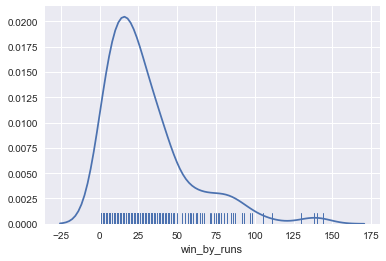

In [93]:
sns.distplot(matches[matches['win_by_runs'] != 0].win_by_runs, hist=False, rug=True)

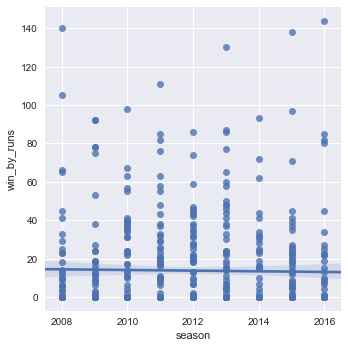

In [94]:
sns.lmplot(x='season', y='win_by_runs', data=matches)

#sns.lmplot(x='season', y='win_by_runs', fit_reg=False, data=matches)

In [95]:
ipl = matches[['id', 'season', 'winner']].merge(deliveries, left_on = 'id', right_on = 'match_id').drop('match_id', axis = 1)

team_score = ipl.groupby(['id','inning','batting_team', 'winner']).total_runs.sum().reset_index(name = 'Score')
boundaries = ipl[ipl['total_runs'].isin([4,6])].groupby(['id','inning','batting_team', 'winner']).total_runs.count().reset_index(name = 'Boundaries')
score_boundaries = team_score.merge(boundaries, on = ['id','inning','batting_team', 'winner'])
score_boundaries.head()

,id,inning,batting_team,winner,Score,Boundaries
0,1,1,Kolkata Knight Riders,Kolkata Knight Riders,222,30
1,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,82,7
2,2,1,Chennai Super Kings,Chennai Super Kings,240,35
3,2,2,Kings XI Punjab,Chennai Super Kings,207,27
4,3,1,Rajasthan Royals,Delhi Daredevils,129,17


#### Plot of Total score vs total boundaries

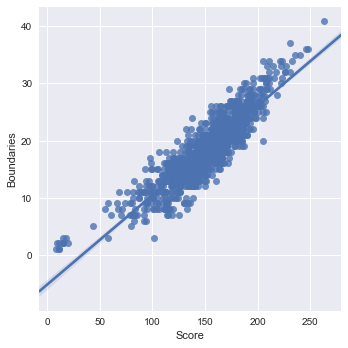

In [96]:
sns.lmplot(x = 'Score', y = 'Boundaries', data = score_boundaries)

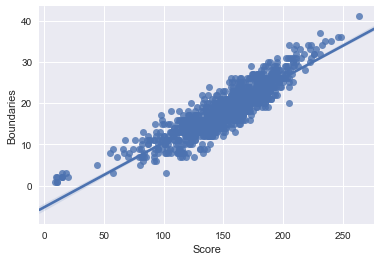

In [97]:
sns.regplot(x = 'Score', y = 'Boundaries', data = score_boundaries)

#### Difference between lmplot() and regplot():




### Facetgrid



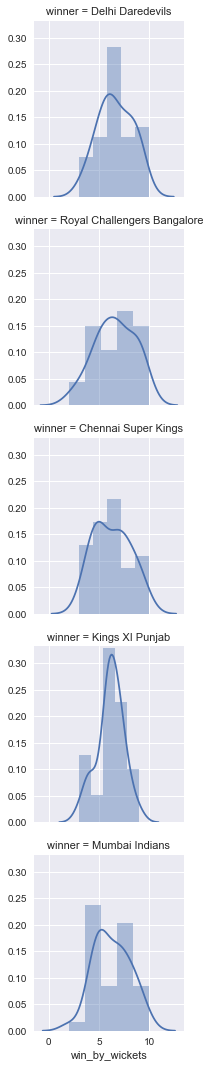

In [107]:
matches_filter = matches[(matches['winner'].isin(top_teams)) & (matches['win_by_wickets'] != 0)]
g = sns.FacetGrid(matches_filter, row='winner')
g.map(sns.distplot, "win_by_wickets", bins = 5)

#### Conditioning on other variables

In [108]:
score_boundaries['is_winner'] = (score_boundaries['batting_team'] == score_boundaries['winner']).astype(int)
score_boundaries.head()

,id,inning,batting_team,winner,Score,Boundaries,is_winner
0,1,1,Kolkata Knight Riders,Kolkata Knight Riders,222,30,1
1,1,2,Royal Challengers Bangalore,Kolkata Knight Riders,82,7,0
2,2,1,Chennai Super Kings,Chennai Super Kings,240,35,1
3,2,2,Kings XI Punjab,Chennai Super Kings,207,27,0
4,3,1,Rajasthan Royals,Delhi Daredevils,129,17,0


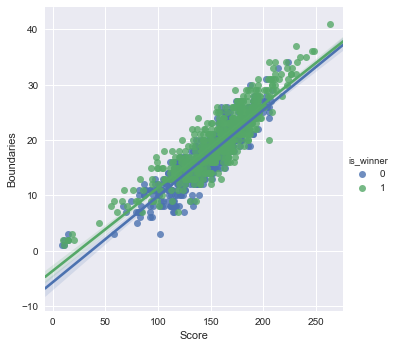

In [109]:
sns.lmplot(x = 'Score', y = 'Boundaries', hue = 'is_winner',data = score_boundaries)

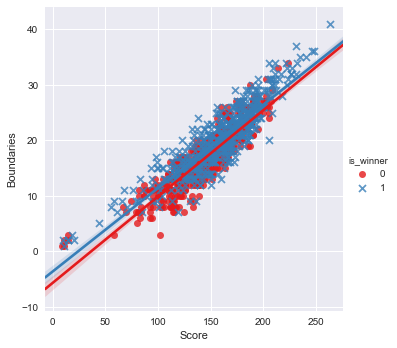

In [110]:
sns.lmplot(x = 'Score', y = 'Boundaries', hue = 'is_winner',markers = ['o', 'x'], palette="Set1", data = score_boundaries)

#### Add another variable

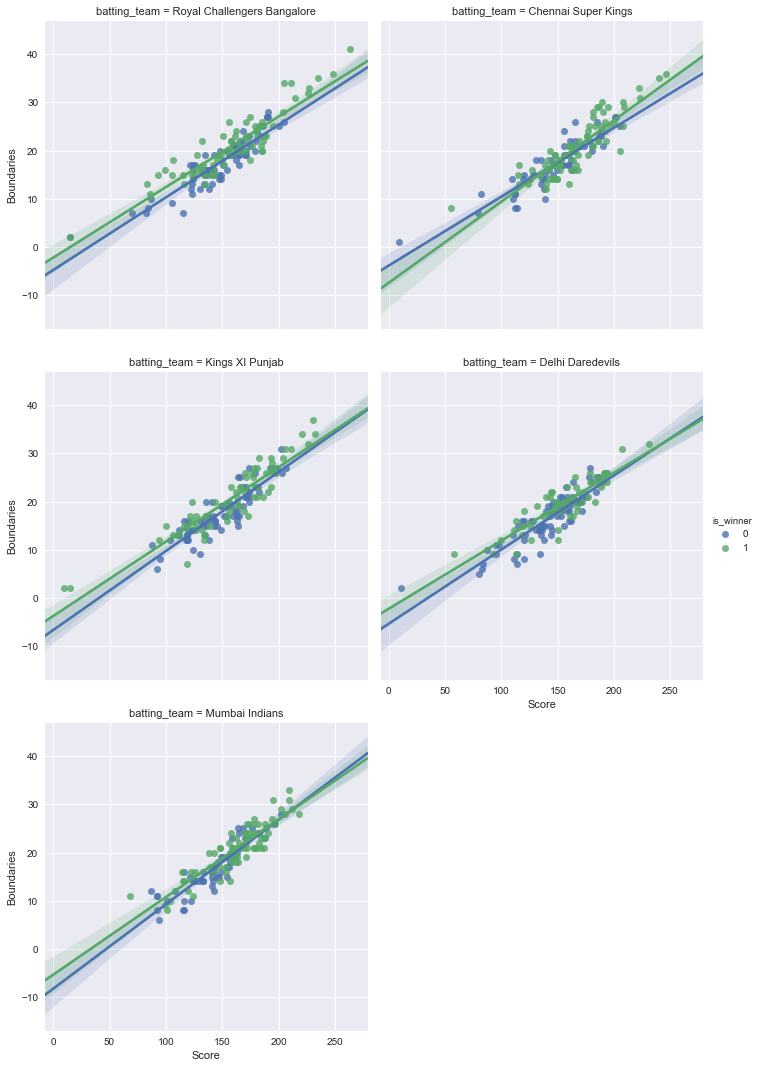

In [111]:
sns.lmplot(x = 'Score', y = 'Boundaries', hue = 'is_winner', col = 'batting_team', \
           col_wrap=2, data = score_boundaries[score_boundaries['batting_team'].isin(top_teams)])

#### Add two more variables

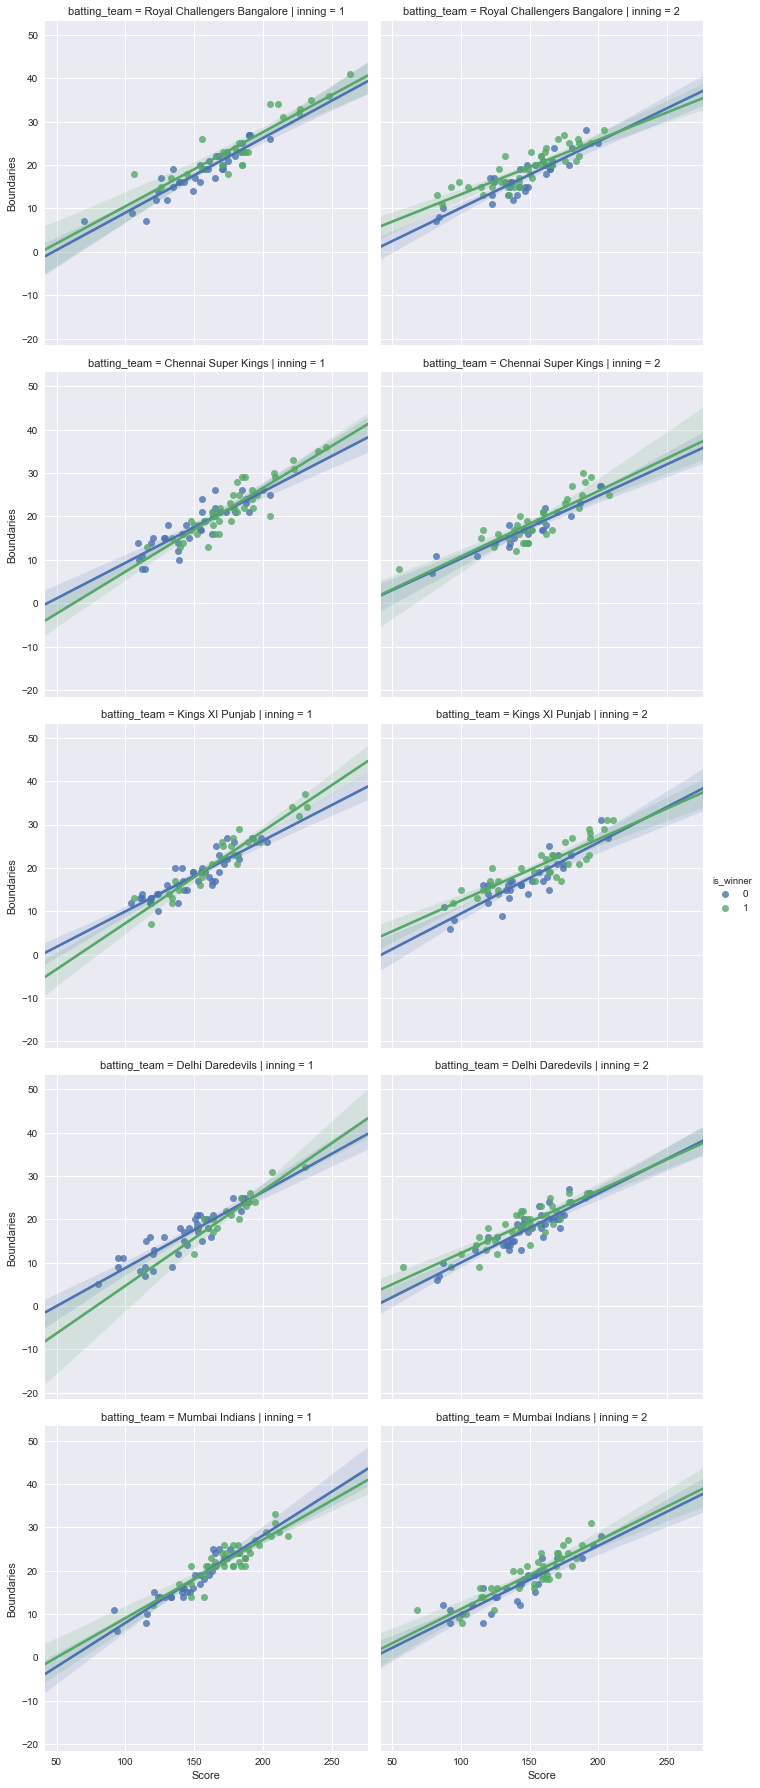

In [113]:
sns.lmplot(x = 'Score', y = 'Boundaries', hue = 'is_winner', col = 'inning', row = 'batting_team',  
data = score_boundaries[(score_boundaries['batting_team'].isin(top_teams)) & (score_boundaries['inning'].isin([1,2]))])

### Controlling the size and shape of the plot

regplot() is an “axes-level” function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explictly provided, it simply uses the “currently active” axes

lmplot() figure is controlled through the FacetGrid interface using the size (Height in inches of each facet) and aspect (Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches) parameters, which apply to each facet in the plot, not to the overall figure itself

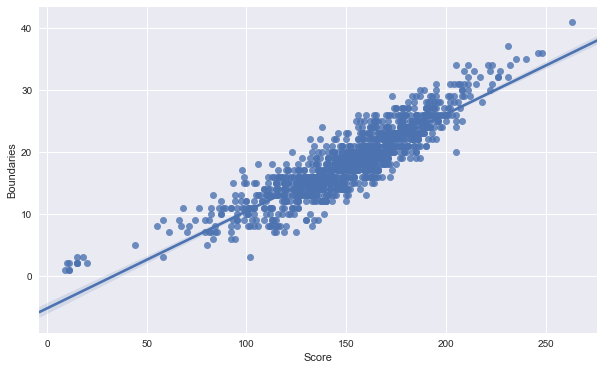

In [114]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x = 'Score', y = 'Boundaries', data = score_boundaries)

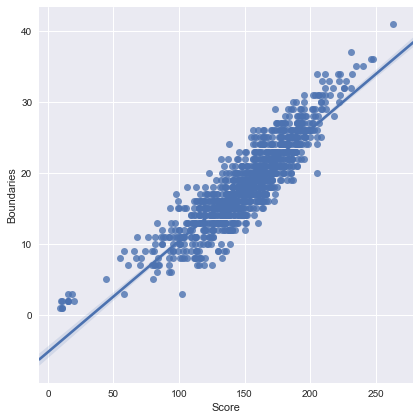

In [115]:
sns.lmplot(x = 'Score', y = 'Boundaries', size = 6, data = score_boundaries) #Height in inches

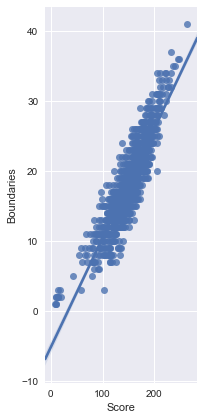

In [116]:
sns.lmplot(x = 'Score', y = 'Boundaries', size = 6, aspect = 0.5, data = score_boundaries) #Aspect ratio of each facet

#### pairplot()

pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset

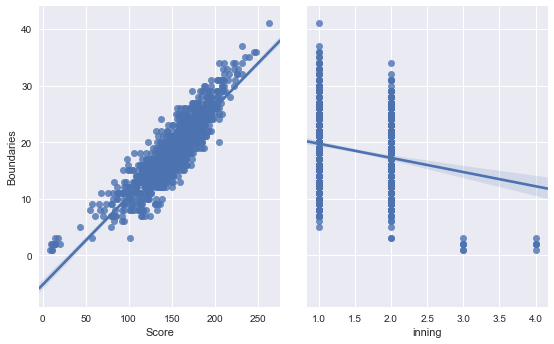

In [117]:
sns.pairplot(x_vars=["Score", "inning"], y_vars=["Boundaries"],size=5, aspect=.8, kind="reg", data = score_boundaries)

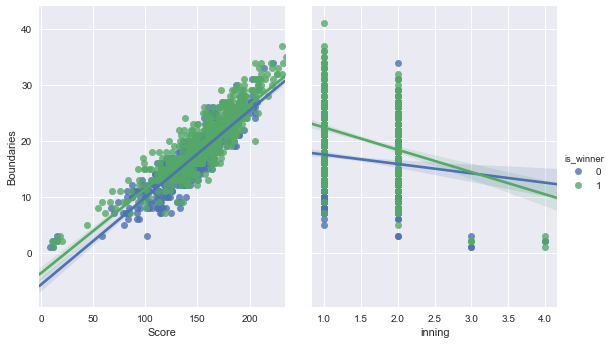

In [118]:
sns.pairplot(x_vars=["Score", "inning"], y_vars=["Boundaries"], hue = 'is_winner',\
size=5, aspect=.8, kind="reg", data = score_boundaries)

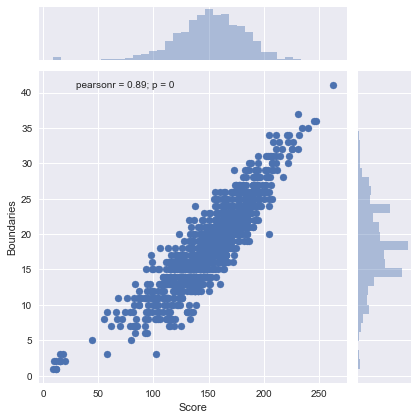

In [119]:
sns.jointplot(x='Score', y='Boundaries', data=score_boundaries)

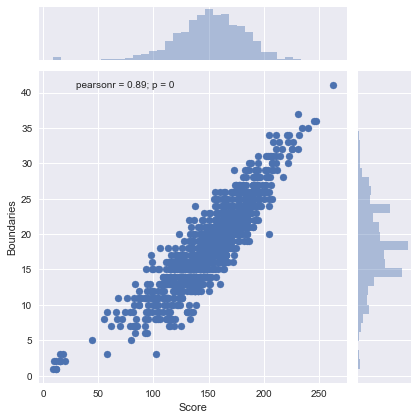

In [121]:
sns.jointplot(x='Score', y='Boundaries', data=score_boundaries)